In [1]:
import sys
sys.path.append("..")
import torch
from tqdm.notebook import tqdm
import mango

In [2]:
size = 12
p = 0.5
gamma = 0.8

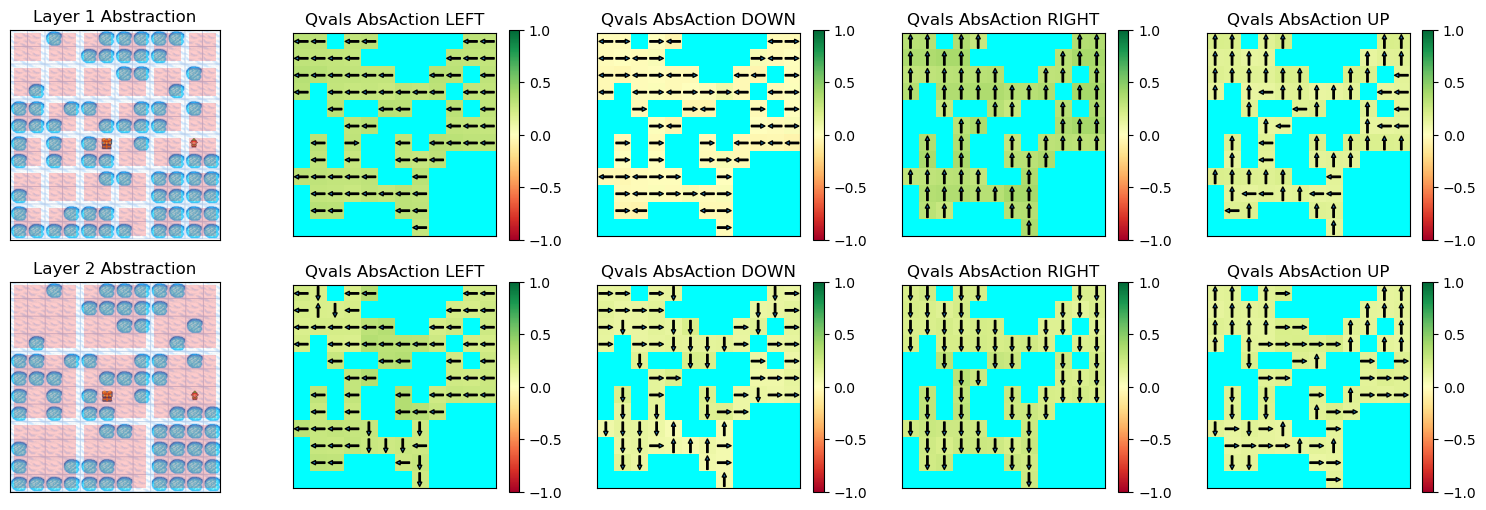

In [3]:
path_to_dir = f"trained_models/frozen_lake/map={size}x{size}_p={int(p*100)}%/"
option_manager = mango.saving.load_from(path=path_to_dir + "option_manager.pickle")
environment = mango.saving.load_from(path=path_to_dir + "option_manager.pickle").environment
mango.environments.frozen_lake.plot_utils.plot_all_qvals(option_manager)

In [4]:
policy_params = dict(
    lr=1e-4,
    gamma=0.99,
    net_params=dict(
        hidden_channels=[4, 4, 4, 4],
        hidden_features=[],
        batch_norm=False,
        activation_out=torch.nn.Tanh()
        # device=torch.device("cuda") if torch.cuda.is_available() else None,
    ),
)

# agent that interacts with the environment
agent = mango.Agent(
    environment=environment,
    policy_cls=mango.policies.DQNetPolicy,
    policy_params=policy_params
)

# agent that interacts with the option manager
mango_agent = mango.Agent(
    environment=option_manager,
    policy_cls=mango.policies.DQNetPolicy,
    policy_params=policy_params
)

In [5]:
N = 10000
K = 10
randomness = [((N-1-i)/N) for i in range(N)]
for r in (pbar := tqdm(randomness)):
    pbar.set_description(f"randomness: {r:.3f}")
    obs, reward, term, trunc, info = agent.explore(episode_length=size**2, randomness=r)
    for _ in range(K):
        agent.train()
mango.saving.save_to(path=path_to_dir+"/agent.pickle", obj=agent)

  0%|          | 0/10000 [00:00<?, ?it/s]

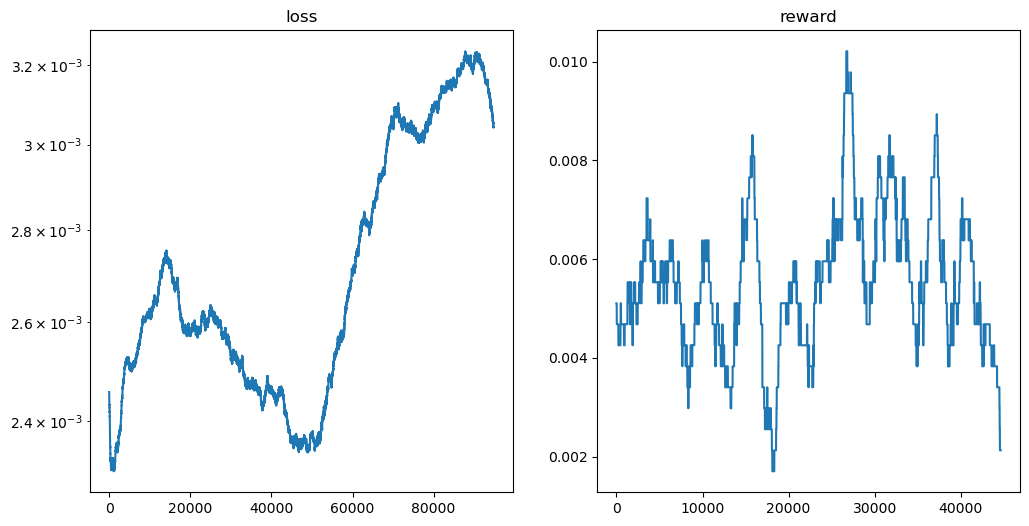

In [6]:
mango.utils.plotting.plot_agent_loss_reward(agent)